<h1><center> 
     Example of hvsrprocpy Usage
</center></h1>
<center>
    By: Francisco Javier G. Ornelas (jornela1@ucla.edu)<br>Originally created: Apr. 28, 2024<br>
</center>

In [1]:
# pip install -i https://test.pypi.org/simple/ hvsrprocpy

In [26]:
#Import the hvsrprocpy package from pypi
import hvsrprocpy as hv

In [27]:
#Print statement to see what are the functions and inputs within hvsrProc
# help(hv.hvsrfunctools.hvsr)

Pre-processing noise data is DONE!


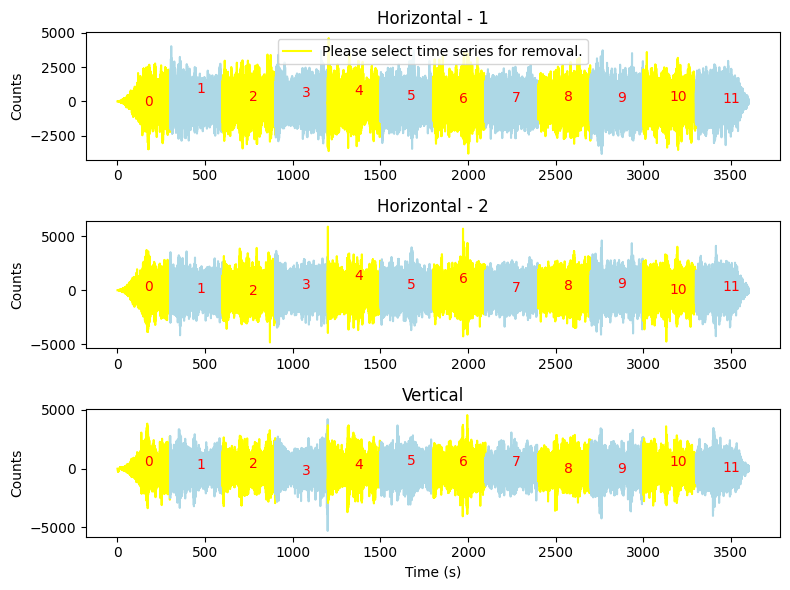

Enter the index of the window to remove (Press q to quit): q
Time-domain selection is DONE!
Preparing for frequency-domain, please wait...


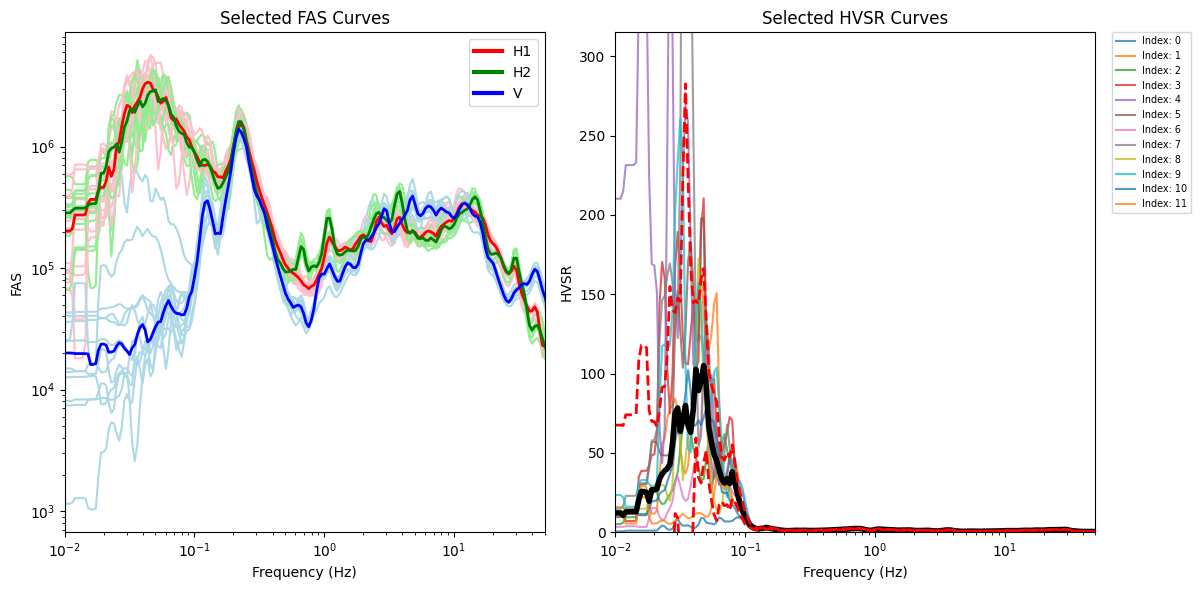

Enter the index of the curve to remove (press 'q' to quit): q
Frequency-domain selection is DONE!
Everything is DONE, check out the results in the output folder!
CPU times: total: 12 s
Wall time: 1min 15s


In [37]:
%%time

#Specify directory where .txt or .mseed files are stored
direc = r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\VSPDB Data\CA Vertical Array Data\HVSRdata\2\2.250.2\Text_File_data\Raw_ascii_PEG_HH'

#Specify filenames of .mseed or .txt files
h1 = '20220907170054_NX_USC6_HHN.txt'
h2 = '20220907170058_NX_USC6_HHE.txt'
v = '20220907170100_NX_USC6_HHZ.txt'

#specify where you want output to be stored
output_dir =  r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\HVSR VSPDB Data'

h1, h2, v, dt, time = hv._hvhelper.process_time_series(h1_fn=h1, h2_fn=h2, v_fn=v, directory=direc, 
                                                       file_type=2, time_cut=120)

#Use the main function hv_proc which processes time series and hvsr
win_result, fd_select = \
hv.hvsrfunctools.hvsr(h1=h1, h2 =h2, v=v, dt = dt, time_ts=time, output_dir=output_dir, 
                      win_width=300, overlapping=0, plot_ts=True, plot_hvsr=True, output_polar_curves=False, norm_flag = False)

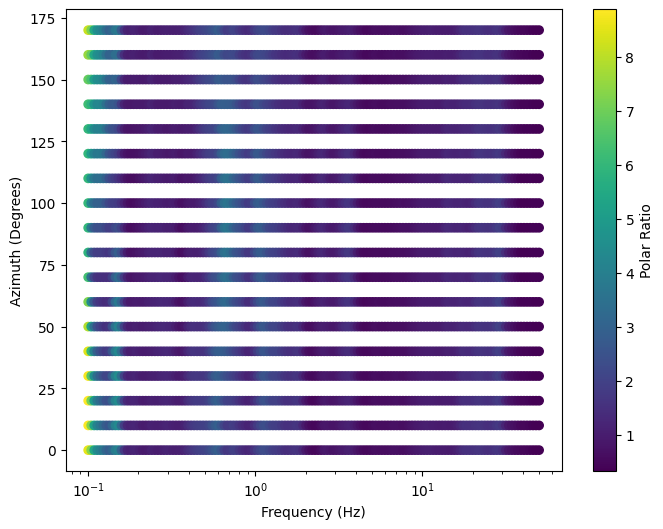

In [31]:
#Plot Polar Curve from output of hvsrProc
import pymysql, json
import os
import pandas as pd

#specify directory where polar curve data is stored
POLAR = pd.read_csv(os.path.join(output_dir,'Test_hvsr_polar.csv'))

#specify where json file of frequencies is stored
standard_freqs = json.load(open(r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\Site Response Modelling Inv\GMDB OSAKA INV\mean_curves/HVSR_VSPDB_standard_frequencies.json'))

#specify degree increment
deg_increment = 10

#Specify azimuth
AZIMUTHS = list(range(0, 180, deg_increment))

#Process polar curve data
processed_pol_data = hv.hvsrplot.process_polar_curve(polar_data = POLAR, azimuths = AZIMUTHS, standard_freqs = standard_freqs)

#Plot the polar curve
fig = hv.hvsrplot.plot_polar_ratio(processed_pol_data)

# fig.savefig(r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\HVSR VSPDB Data/test.png', dpi =500)

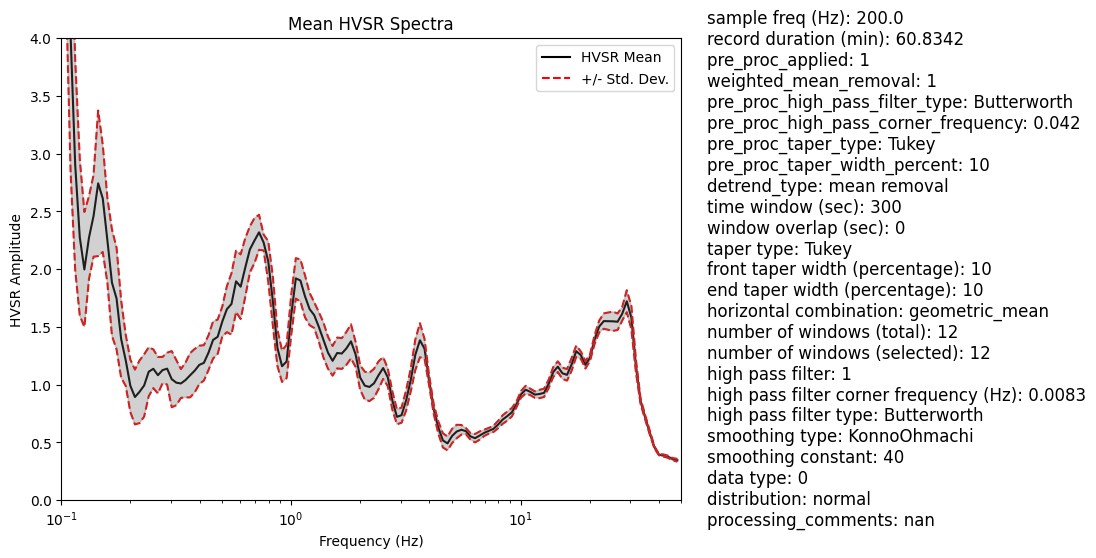

In [32]:
#Specify directory where mean hvsr curve is stored
Mean_df = os.path.join(output_dir,'Test_hvsr_mean.csv')

#Specify directory where metadata is stored
metadata_csv_filepath = os.path.join(output_dir,'Test_metadata.csv')

#Plot the mean curve
fig = hv.hvsrplot.plot_mean_hvsr(csv_file_path=Mean_df, metadata_csv_path=metadata_csv_filepath, xlim_m = 65, ylim_m = 2,
                              xlim=(0.1, 50), ylim=(0,4), robust_est=False, metadata_flag=True)

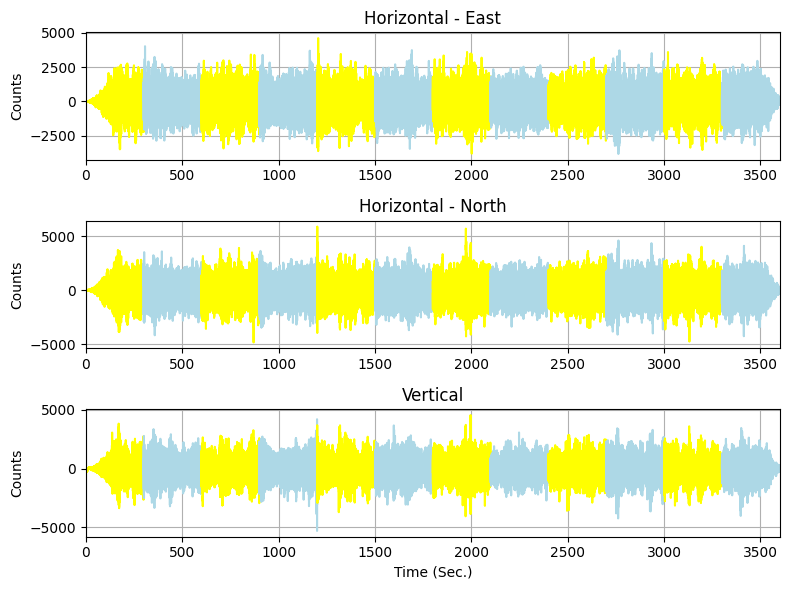

In [33]:
#Plot selected and unselected time series from output of hvsrProc

#Specify directory where the time series is stored
ts_df = os.path.join(output_dir,'Test_ts_sel.csv')

#Plot the time series
fig = hv.hvsrplot.plot_selected_time_series(csv_file_path = ts_df)

# fig.savefig(r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\HVSR VSPDB Data/test.png', dpi =500)

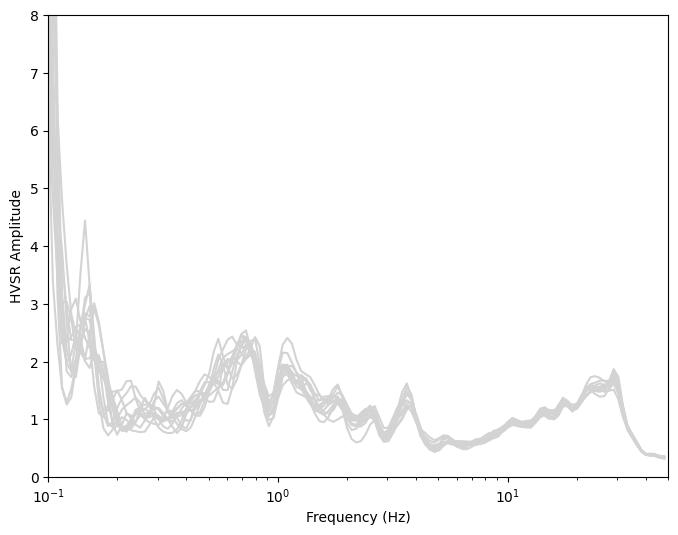

In [34]:
#Plot selected time series from output of hvsrProc

#Specify where the directory for the selected hvsr curves are located
sel_curve_dir = os.path.join(output_dir,'Test_hvsr_sel.csv')

#Plot the selected hvsr curves
fig = hv.hvsrplot.plot_selected_hvsr(sel_curve_dir,xlim=(0.1, 50), ylim=(0, 8))

# fig.savefig(r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\HVSR VSPDB Data/test.png', dpi =500)

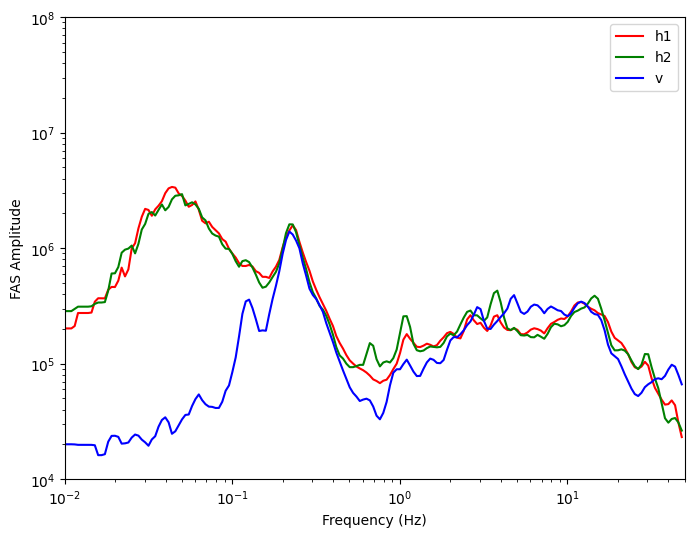

In [35]:
csv_path = os.path.join(output_dir,'Test_FAS_mean.csv')

fig = hv.hvsrplot.plot_fas(csv_path, xlim=(0.01, 50), ylim=(10e3, 10e7))

# fig.savefig(r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\HVSR VSPDB Data/test.png', dpi =500)

In [29]:
#Example of using tools to process metadata for station xml files

# Example usage for multi site:

#Specify the static metadata
field_crew = None
user = 'francisco javier ornelas'
weather = None
ground_type = None
sensor_ground_coupling = None
monochromatic = None
building = None
transients = None
data_type = 0
sensor_corner_frequency = 0.0083
gain = 1
comments = None

#Specify the directory where the stations are stored
directory = r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\10'

#Run the tool
df = hv.HvsrMetaTools.process_hvsr_metadata(field_crew, user, weather, ground_type, sensor_ground_coupling,
                                            monochromatic, building, transients, data_type,
                                            sensor_corner_frequency, gain, comments, directory)

#Save the dataframe (df) if needed
# df.to_csv(os.path.join(directory,'gmdb_query_metadata.csv'),header =True, index=False)

#Visualize the df
df

,name,longitude,latitude,elevation,start_date,end_date,start_time,end_time,field_crew,seismic_recorder,...,building,transients,azimuth,user,comments,data_type,mass_position_w,mass_position_v,mass_position_u,mag_dec
0,10.0.0,-118.178297,34.037050,83.7,2024-05-30,None,18:43:35.00000,,None,Pegasus Portable Digital Recorder PGS-140,...,None,None,0,francisco javier ornelas,None,0,None,None,None,None
1,10.250.1,-118.175745,34.036540,120.7,2024-05-30,2024-05-30,17:01:35.00000,18:13:26.00000,None,Pegasus Portable Digital Recorder PGS-140,...,None,None,0,francisco javier ornelas,None,0,None,None,None,None
2,10.250.2,-118.176393,34.038562,94.0,2024-05-30,None,20:04:07.00000,,None,Pegasus Portable Digital Recorder PGS-140,...,None,None,0,francisco javier ornelas,None,0,None,None,None,None
3,10.250.3,-118.178783,34.034881,78.8,2024-05-30,2024-05-30,17:26:54.00000,18:42:16.00000,None,Pegasus Portable Digital Recorder PGS-140,...,None,None,0,francisco javier ornelas,None,0,None,None,None,None
4,10.250.4,-118.180522,34.036645,104.5,2024-05-30,2024-05-30,17:22:35.00000,18:44:36.00000,None,Pegasus Portable Digital Recorder PGS-140,...,None,None,0,francisco javier ornelas,None,0,None,None,None,None
5,10.50.1,-118.177850,34.037202,86.4,2024-05-30,None,18:49:51.00000,,None,Pegasus Portable Digital Recorder PGS-140,...,None,None,0,francisco javier ornelas,None,0,None,None,None,None
6,10.50.2,-118.177863,34.036742,89.6,2024-05-30,2024-05-30,18:14:44.00000,19:27:07.00000,None,Pegasus Portable Digital Recorder PGS-140,...,None,None,0,francisco javier ornelas,None,0,None,None,None,None
7,10.50.4,-118.178158,34.037463,92.2,2024-05-30,None,19:28:27.00000,,None,Pegasus Portable Digital Recorder PGS-140,...,None,None,0,francisco javier ornelas,None,0,None,None,None,None
8,10.500.1,-118.177868,34.041472,94.8,2024-05-30,2024-05-30,18:45:54.00000,20:02:42.00000,None,Pegasus Portable Digital Recorder PGS-140,...,None,None,0,francisco javier ornelas,None,0,None,None,None,None
9,10.500.2,-118.183667,34.036168,103.1,2024-05-30,2024-05-30,16:06:20.00000,17:21:32.00000,None,Pegasus Portable Digital Recorder PGS-140,...,None,None,0,francisco javier ornelas,None,0,None,None,None,None


In [30]:
#Example of using a tool to combine all metadata files

#Specify the folder path where the stations are stored
folder_path = r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\10'

#Specify a unique set of folders thats contained in all station folders
add_sim_path = 'Text_File_data/Raw_mseed_PEG_HH'

#Run the metadata tool
combined_metadata = hv.HvsrMetaTools.combine_metadata(folder_path,add_sim_path)

#Visualize the dataframe (combined_metadata)
combined_metadata

,name,sample freq (Hz),record duration (min),pre_proc_applied,weighted_mean_removal,pre_proc_high_pass_filter_type,pre_proc_high_pass_corner_frequency,pre_proc_taper_type,pre_proc_taper_width_percent,detrend_type,...,number of windows (total),number of windows (selected),high pass filter,high pass filter corner frequency (Hz),high pass filter type,smoothing type,smoothing constant,data type,distribution,processing_comments
0,10.0.0,200.0,69.5918,1,1,Butterworth,0.042,Tukey,10,mean removal,...,13,13,1,0.0083,Butterworth,KonnoOhmachi,20,0,normal,NaN
1,10.250.1,200.0,55.9685,1,1,Butterworth,0.042,Tukey,10,mean removal,...,11,11,1,0.0083,Butterworth,KonnoOhmachi,20,0,normal,NaN
2,10.250.2,200.0,40.8580,1,1,Butterworth,0.042,Tukey,10,mean removal,...,8,8,1,0.0083,Butterworth,KonnoOhmachi,20,0,normal,NaN
3,10.250.3,200.0,57.9887,1,1,Butterworth,0.042,Tukey,10,mean removal,...,11,11,1,0.0083,Butterworth,KonnoOhmachi,20,0,normal,NaN
4,10.250.4,200.0,56.3427,1,1,Butterworth,0.042,Tukey,10,mean removal,...,11,11,1,0.0083,Butterworth,KonnoOhmachi,20,0,normal,NaN
5,10.50.1,200.0,57.0213,1,1,Butterworth,0.042,Tukey,10,mean removal,...,11,11,1,0.0083,Butterworth,KonnoOhmachi,20,0,normal,NaN
6,10.50.2,200.0,58.4673,1,1,Butterworth,0.042,Tukey,10,mean removal,...,11,11,1,0.0083,Butterworth,KonnoOhmachi,20,0,normal,NaN
7,10.50.4,200.0,58.5172,1,1,Butterworth,0.042,Tukey,10,mean removal,...,11,11,1,0.0083,Butterworth,KonnoOhmachi,20,0,normal,NaN
8,10.500.1,200.0,55.7752,1,1,Butterworth,0.042,Tukey,10,mean removal,...,11,11,1,0.0083,Butterworth,KonnoOhmachi,20,0,normal,NaN
9,10.500.2,200.0,56.0643,1,1,Butterworth,0.042,Tukey,10,mean removal,...,11,11,1,0.0083,Butterworth,KonnoOhmachi,20,0,normal,NaN
